- Nama : Audita Bella Intan Puspita
- Kelas : PYTN-KS18-05

## Assignment 2

### Project Overview
Using what you’ve learned; download the NYC Property Sales Dataset from Kaggle. This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

- BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
- BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
- BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

- Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
- This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

Formulate a question and derive a statistical hypothesis test to answer the question. You have to demonstrate that you’re able to make decisions using data in a scientific manner. Examples of questions can be:

- Is there a difference in unit sold between property built in 1900-2000 and 2001 so on?
- Is there a difference in unit sold based on building category?
- What can you discover about New York City real estate by looking at a year's worth of raw transaction records? Can you spot trends in the market?

#### Import Function

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Read Dataset

In [2]:
df = pd.read_csv('nyc-rolling-sales.csv')
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


drop kolom Unnamed:0 karena tidak mandatory

In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


#### Deskripsi Setiap Atribut

In [4]:
print("----Informasi Baris dan Kolom----")
print("Baris : ", df.shape[0])
print("Kolom : ", df.shape[1])

----Informasi Baris dan Kolom----
Baris :  84548
Kolom :  21


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   EASE-MENT                       84548 non-null  object
 7   BUILDING CLASS AT PRESENT       84548 non-null  object
 8   ADDRESS                         84548 non-null  object
 9   APARTMENT NUMBER                84548 non-null  object
 10  ZIP CODE                        84548 non-null  int64 
 11  RESIDENTIAL UNITS               84548 non-null  int64 
 12  COMMERCIAL UNITS                84548 non-null

#### Melakukan replacing null data

In [6]:
df.replace('0', np.nan, inplace=True)

In [7]:
df.replace(' ', np.nan, inplace=True)

In [8]:
df.replace(' -  ', np.nan, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         84548 non-null  int64  
 1   NEIGHBORHOOD                    84548 non-null  object 
 2   BUILDING CLASS CATEGORY         84548 non-null  object 
 3   TAX CLASS AT PRESENT            83810 non-null  object 
 4   BLOCK                           84548 non-null  int64  
 5   LOT                             84548 non-null  int64  
 6   EASE-MENT                       0 non-null      float64
 7   BUILDING CLASS AT PRESENT       83810 non-null  object 
 8   ADDRESS                         84548 non-null  object 
 9   APARTMENT NUMBER                19051 non-null  object 
 10  ZIP CODE                        84548 non-null  int64  
 11  RESIDENTIAL UNITS               84548 non-null  int64  
 12  COMMERCIAL UNITS                

EASE-MENT memiliki 0 non-null. maka kita akan drop kolom tersebut

In [10]:
df.drop('EASE-MENT', axis=1, inplace=True)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,NaN,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,NaN,10009,28,3,31,4616,18690,1900,2,C7,NaN,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,NaN,10009,16,1,17,2212,7803,1900,2,C7,NaN,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,NaN,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,NaN,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


#### Jumlah Duplikasi Data

In [11]:
df.duplicated().sum()

765

In [12]:
df = df.drop_duplicates(inplace= False)
print("Jumlah duplikasi data : " + str(df.duplicated().sum()))

Jumlah duplikasi data : 0


#### Jumlah Missing Values

In [13]:
# Cek missing value
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

In [14]:
cek_null(df)

                           Total   Percent
APARTMENT NUMBER           64935  0.775038
GROSS SQUARE FEET          38745  0.462445
LAND SQUARE FEET           36351  0.433871
SALE PRICE                 24188  0.288698
TAX CLASS AT PRESENT         738  0.008808
BUILDING CLASS AT PRESENT    738  0.008808


In [15]:
df.drop('APARTMENT NUMBER', axis=1, inplace=True)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616,18690,1900,2,C7,NaN,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212,7803,1900,2,C7,NaN,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


#### MENGGUNAKAN KOLOM SALE PRICE UNTUK CENTRAL TENDENCY

In [16]:
data_sales = df.copy()

In [17]:
data_sales["SALE PRICE"] = data_sales["SALE PRICE"].astype(float)

menghitung mean dari sale price Namun sebelumnya, perlu dilakukan penanganan outlier

In [18]:
Q1 = data_sales['SALE PRICE'].quantile(0.25)
Q3 = data_sales['SALE PRICE'].quantile(0.75)
IQR = Q3 - Q1

LOWER_LIMIT = Q1 - (1.5 * IQR)
UPPER_LIMIT = Q3 + (1.5 * IQR)

outliers_upper = data_sales['SALE PRICE'][(data_sales['SALE PRICE'] > UPPER_LIMIT)]
outliers_lower = data_sales['SALE PRICE'][(data_sales['SALE PRICE'] < LOWER_LIMIT)]
jumlah_outlier =  outliers_lower.size + outliers_upper.size
print("Total outlier: ", jumlah_outlier)

Total outlier:  6329


In [19]:
LOWER_LIMIT

-687500.0

In [20]:
persentase_outlier = (jumlah_outlier / data_sales['SALE PRICE'].size) * 100
persentase_outlier

7.554038408746404

<Axes: xlabel='SALE PRICE', ylabel='Density'>

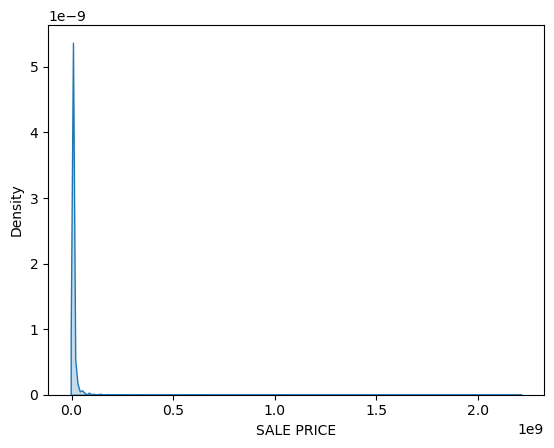

In [21]:
sns.kdeplot(data_sales['SALE PRICE'], fill=True)

In [23]:
print('Jumlah baris data sebelum data outlier di-drop: ',data_sales.shape[0])
data_sales = data_sales.loc[data_sales['SALE PRICE'] < UPPER_LIMIT]
data_sales = data_sales.loc[data_sales['SALE PRICE'] > LOWER_LIMIT]

print('Jumlah baris data setelah data outlier di-drop: ',data_sales.shape[0])

Jumlah baris data sebelum data outlier di-drop:  83783
Jumlah baris data setelah data outlier di-drop:  53266


<Axes: xlabel='SALE PRICE', ylabel='Density'>

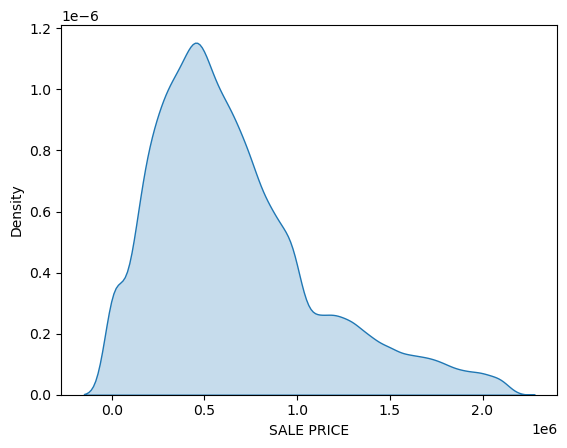

In [24]:
sns.kdeplot(data_sales['SALE PRICE'], fill=True)

#### MEAN

In [25]:
mean_sales_price = data_sales['SALE PRICE'].mean()
print("Mean Sales Price: ", mean_sales_price)

Mean Sales Price:  659376.2674313821


#### MEDIAN

In [26]:
median_sales_price = data_sales['SALE PRICE'].median()
print("Median Sales Price: ", median_sales_price)

Median Sales Price:  565000.0


#### MODUS

In [27]:
data_neighborhood = df.copy()

In [28]:
modus_neighborhood = data_neighborhood['NEIGHBORHOOD'].mode()
print("Modus neighborhood: ", modus_neighborhood)

Modus neighborhood:  0    FLUSHING-NORTH
Name: NEIGHBORHOOD, dtype: object


#### RANGE

In [29]:
range_sale_price = np.max(data_sales['SALE PRICE']) - np.min(data_sales['SALE PRICE'])
range_sale_price

2131999.0

#### VARIANCE

In [30]:
variance_sale_price = np.var(data_sales['SALE PRICE'])
variance_sale_price

194807495206.58487

#### STANDAR DEVIASI

In [31]:
standar_deviasi_sale_price = np.std(data_sales['SALE PRICE'])
standar_deviasi_sale_price

441370.0207383651

#### CONFIDENCE INTERVAL

In [32]:
data_ci = df.copy()

In [33]:
data_ci['TAX CLASS AT PRESENT'].unique()

array(['2A', '2', '2B', '2C', nan, '4', '1', '1C', '3', '1A', '1B'],
      dtype=object)

In [34]:
dx = data_ci[['BOROUGH', 'TAX CLASS AT PRESENT']].dropna()

In [35]:
pd.crosstab(dx.BOROUGH, dx['TAX CLASS AT PRESENT'])

TAX CLASS AT PRESENT,1,1A,1B,1C,2,2A,2B,2C,3,4
BOROUGH,,,,,,,,,,
1,333,3,0,13,15239,172,248,589,1,1229
2,4034,117,214,0,1774,244,83,1,2,525
3,11654,429,278,166,5805,1427,373,1227,0,2132
4,15627,381,390,4,7533,605,88,86,0,1724
5,6681,510,326,3,370,44,7,4,0,350


In [36]:
#p_11 = tax 1 & borough 1
n = 333+4034+11654+15627+6681
p_11 = 226/n
p_11

0.005896318714289441

In [37]:
n

38329

In [38]:
se_11 = np.sqrt(p_11 * (1-p_11)/ n)
se_11

0.00039105925799361353

In [39]:
import statsmodels.api as sm
sm.stats.proportion_confint(n*p_11, n)

(0.005129856652801001, 0.006662780775777881)

kesimpulan = jadi, CI dari data tax class at present 1 di borough 1 adalah (0.005129856652801001, 0.006662780775777881)

#### HYPOTESIS TESTING
melakukan testing apakah rata2 sales price di borough 1 memiliki perbedaan signifikan terhadap rata2 sales price di borough 2

In [40]:
ht = df.copy()

In [41]:
ht.head(2)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616,18690,1900,2,C7,NaN,2016-12-14 00:00:00


In [42]:
ht["SALE PRICE"] = ht["SALE PRICE"].astype(float)

In [43]:
ht['SALE PRICE'].info()

<class 'pandas.core.series.Series'>
Int64Index: 83783 entries, 0 to 84547
Series name: SALE PRICE
Non-Null Count  Dtype  
--------------  -----  
59595 non-null  float64
dtypes: float64(1)
memory usage: 1.3 MB


In [44]:
borough1 = ht[ht['BOROUGH'] == 1]
borough2 = ht[ht['BOROUGH'] == 2]

In [45]:
n1 = len(borough1)
mu1 = borough1["SALE PRICE"].mean()
sd1 = borough1["SALE PRICE"].std()

(n1, mu1, sd1)

(18102, 3344641.9823292056, 24140481.087110177)

In [46]:
n2 = len(borough2)
mu2 = borough2["SALE PRICE"].mean()
sd2 = borough2["SALE PRICE"].std()

(n2, mu2, sd2)

(6994, 804793.298374613, 3223718.0611617025)

In [47]:
sm.stats.ztest(borough1['SALE PRICE'].dropna(), borough2['SALE PRICE'].dropna(), alternative='two-sided')

(7.539254610005874, 4.7266532660035915e-14)

Hasil analisis hipotesis menunjukkan bahwa ada perbedaan yang sangat signifikan dalam rata-rata harga jual properti di "borough1" dan "borough2". Nilai p-value yang sangat rendah (4.7266532660035915e-14) jelas-jelas lebih kecil dari tingkat signifikansi umum (0.05). Ini berarti kita dapat mengesampingkan hipotesis nol yang mengatakan bahwa tidak ada perbedaan dalam rata-rata harga jual antara kedua kawasan, dan kita dapat menerima hipotesis alternatif yang menyatakan bahwa ada perbedaan yang signifikan dalam rata-rata harga jual properti di kedua kawasan tersebut.

#### PROBABILITY DISTRIBUTION
mencari distribusi normal dari attribut sale price

In [48]:
prob = df.copy()

In [50]:
prob.head(2)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616,18690,1900,2,C7,NaN,2016-12-14 00:00:00


In [51]:
prob["SALE PRICE"] = prob["SALE PRICE"].astype(float)

In [52]:
Q1 = prob['SALE PRICE'].quantile(0.25)
Q3 = prob['SALE PRICE'].quantile(0.75)
IQR = Q3 - Q1

LOWER_LIMIT = Q1 - (1.5 * IQR)
UPPER_LIMIT = Q3 + (1.5 * IQR)

outliers_upper = prob['SALE PRICE'][(prob['SALE PRICE'] > UPPER_LIMIT)]
outliers_lower = prob['SALE PRICE'][(prob['SALE PRICE'] < LOWER_LIMIT)]
jumlah_outlier =  outliers_lower.size + outliers_upper.size
prob = prob.loc[prob['SALE PRICE'] < UPPER_LIMIT]
prob = prob.loc[prob['SALE PRICE'] > LOWER_LIMIT]

<Axes: xlabel='SALE PRICE', ylabel='Density'>

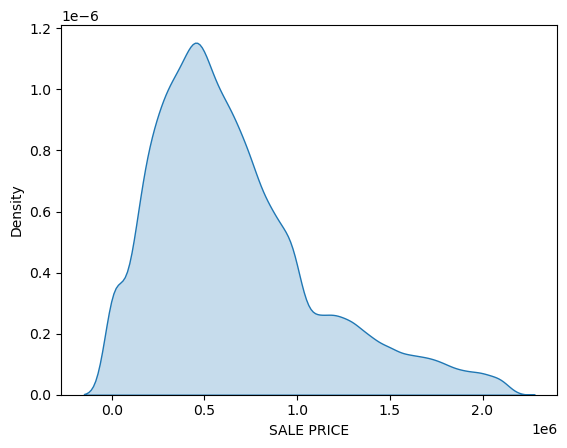

In [53]:
sns.kdeplot(prob['SALE PRICE'], fill=True)

Hasil Probability Distribution dari data Sale Price


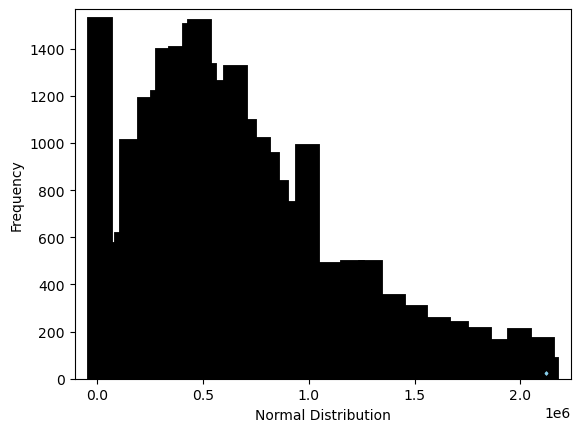

In [54]:
from scipy.stats import norm

ax = sns.histplot(prob['SALE PRICE'],
                 bins=100,
                 color='skyblue',
                 alpha=1,
                 linewidth=15)

ax.set(xlabel='Normal Distribution', ylabel = 'Frequency')
print ("Hasil Probability Distribution dari data Sale Price")